In [1]:
pip install pandas matplotlib seaborn folium

Note: you may need to restart the kernel to use updated packages.


### rainfall data viz ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# load Data
df = pd.read_csv("overall_rainfall_data_2016_2020.csv")

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])


df.head() #just inspecting the basic structure

,day,station_id,station_name,latitude,longitude,total_rainfall
0,2016-12-02,S77,Alexandra Road,1.2937,103.8125,0.0
1,2016-12-02,S109,Ang Mo Kio Avenue 5,1.3764,103.8492,0.0
2,2016-12-02,S117,Banyan Road,1.2560,103.6790,0.0
3,2016-12-02,S55,Buangkok Green,1.3837,103.8860,0.0
4,2016-12-02,S64,Bukit Panjang Road,1.3824,103.7603,0.0


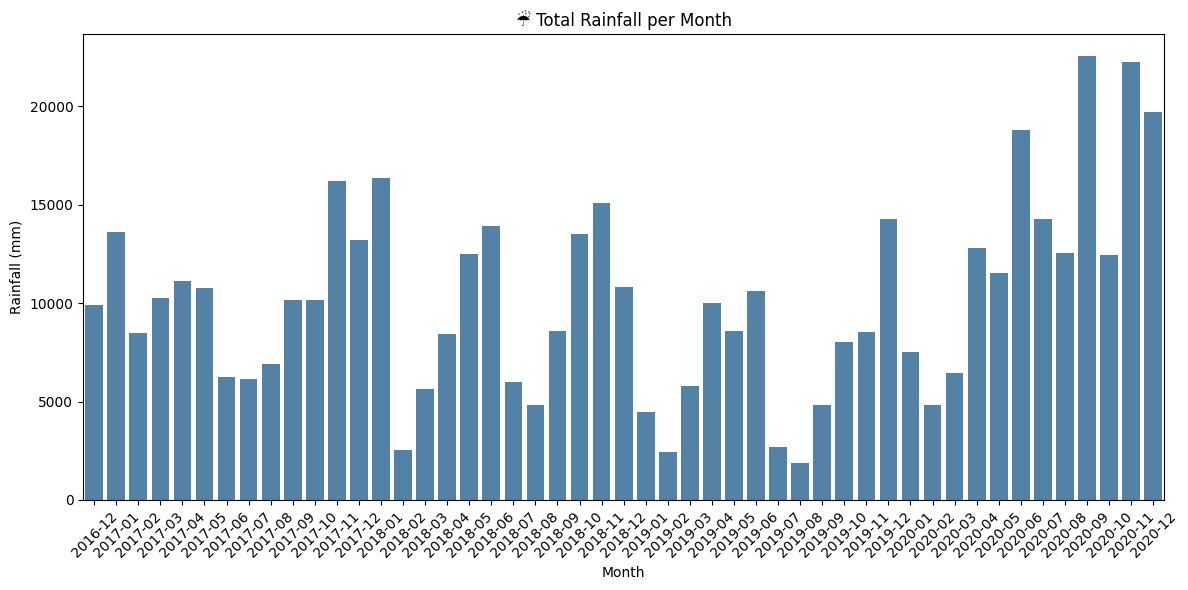

In [7]:
# bar chart for sanity check
df['month'] = df['day'].dt.to_period('M')
monthly_rainfall = df.groupby('month')['total_rainfall'].sum().reset_index()
monthly_rainfall['month'] = monthly_rainfall['month'].astype(str)

# plot
sns.barplot(data=monthly_rainfall, x='month', y='total_rainfall', color='steelblue')
plt.xticks(rotation=45)
plt.title('☔ Total Rainfall per Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

In [8]:
# heatmap for avg rainfall per Station
avg_rainfall_by_station = df.groupby(['station_id', 'station_name', 'latitude', 'longitude'])['total_rainfall'].mean().reset_index()

# Base map centered on Singapore
map_sg = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# Prepare heat data
heat_data = [
    [row['latitude'], row['longitude'], row['total_rainfall']]
    for _, row in avg_rainfall_by_station.iterrows()
]

# Add heatmap layer
HeatMap(heat_data, radius=12).add_to(map_sg)

# Save the map as HTML and show link to it
map_sg.save("singapore_rainfall_heatmap.html")
print("✅ Heatmap saved as 'singapore_rainfall_heatmap.html'. Open this file in a browser to view it.")

✅ Heatmap saved as 'singapore_rainfall_heatmap.html'. Open this file in a browser to view it.


### humidity data viz ###

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
# load Data
df = pd.read_csv("overall_humidity_data_2016_2020.csv")

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])


df.head() #just inspecting the basic structure

,day,station_id,station_name,latitude,longitude,aggregated_value
0,2016-11-16,S109,Ang Mo Kio Avenue 5,1.3764,103.8492,74.8
1,2016-11-16,S117,Banyan Road,1.2560,103.6790,75.8
2,2016-11-16,S50,Clementi Road,1.3337,103.7768,75.2
3,2016-11-16,S43,Kim Chuan Road,1.3399,103.8878,75.5
4,2016-11-16,S108,Marina Gardens Drive,1.2799,103.8703,80.6


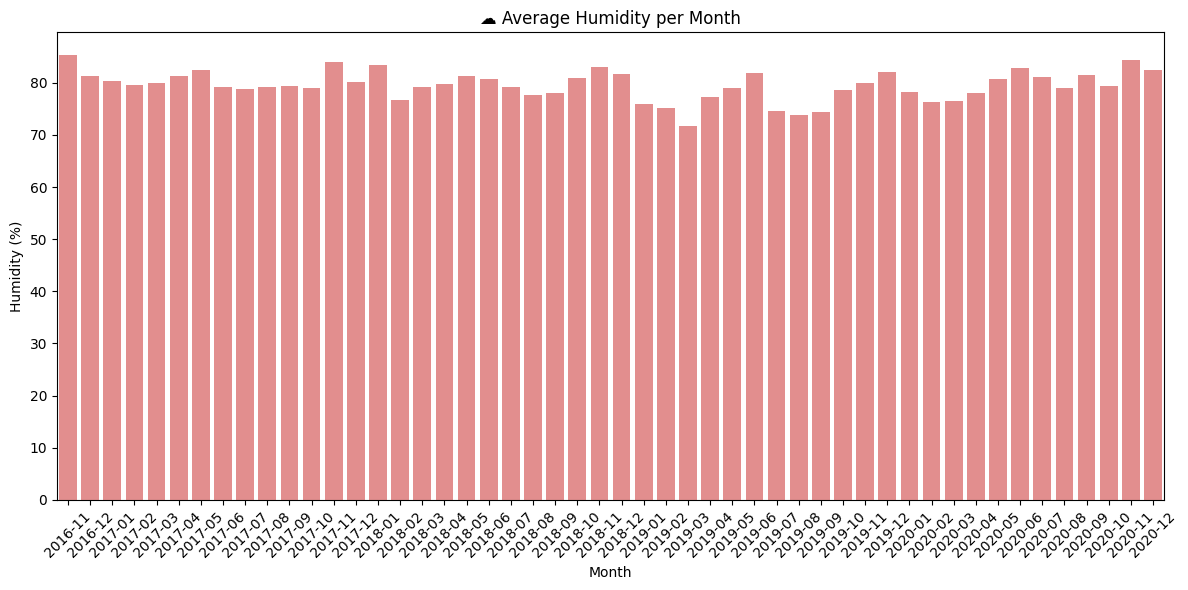

In [11]:
# bar chart for sanity check
df['month'] = df['day'].dt.to_period('M')
monthly_avg_humidity = df.groupby('month')['aggregated_value'].mean().reset_index()
monthly_avg_humidity['month'] = monthly_avg_humidity['month'].astype(str)

# plot
sns.barplot(data=monthly_avg_humidity, x='month', y='aggregated_value', color='lightcoral')
plt.xticks(rotation=45)
plt.title('☁️ Average Humidity per Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

In [12]:
# heatmap of avg humidity per station
avg_humidity_by_station = df.groupby(['station_id', 'station_name', 'latitude', 'longitude'])['aggregated_value'].mean().reset_index()

# base map centered on Singapore
map_humidity = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# prep heat data
heat_data = [
    [row['latitude'], row['longitude'], row['aggregated_value']]
    for _, row in avg_humidity_by_station.iterrows()
]

# add heatmap layer & save the map as HTML and show link to it
HeatMap(heat_data, radius=12).add_to(map_humidity)
map_humidity.save("singapore_humidity_heatmap.html")
print("✅ Humidity heatmap saved as 'singapore_humidity_heatmap.html'.")

✅ Humidity heatmap saved as 'singapore_humidity_heatmap.html'.


In [13]:
import pandas as pd

# 1. Load your spreadsheet (adjust the path as needed)
file_path = 'overall_rainfall_data_2016_2020.csv'
df = pd.read_csv(file_path)

# 2. Compute summary statistics
stats = df['total_rainfall'] \
    .agg(['mean', 'max', 'min']) \
    .rename({'mean': 'Mean', 'max': 'Highest', 'min': 'Lowest'})

print("Rainfall Summary Statistics:")
print(stats)

# 3. Identify the records with the highest and lowest rainfall
highest = df.loc[df['total_rainfall'].idxmax()]
lowest  = df.loc[df['total_rainfall'].idxmin()]

print("\nRecord with Highest Rainfall:")
print(highest.to_frame().T)

print("\nRecord with Lowest Rainfall:")
print(lowest.to_frame().T)

Rainfall Summary Statistics:
Mean         6.172798
Highest    185.200020
Lowest       0.000000
Name: total_rainfall, dtype: float64

Record with Highest Rainfall:
              day station_id station_name latitude longitude total_rainfall
58976  2020-01-29       S117  Banyan Road    1.256   103.679      185.20002

Record with Lowest Rainfall:
          day station_id    station_name latitude longitude total_rainfall
0  2016-12-02        S77  Alexandra Road   1.2937  103.8125            0.0


In [15]:
threshold_value = 50

def count_above(df, column, threshold):
    """
    Returns the count of rows in df where df[column] > threshold.
    """
    return (df[column] > threshold).sum()

# Usage
count_50 = count_above(df, 'total_rainfall', threshold_value)

print(f"Records above {threshold_value}mm: {count_50}")

def threshold_counts(df, column, threshold):
    above = (df[column] > threshold).sum()
    below = (df[column] < threshold).sum()
    total = len(df)
    return pd.DataFrame({
        'Condition': [f'>{threshold}', f'<{threshold}', 'Total'],
        'Count':     [above, below, total]
    })

# Usage:
print(threshold_counts(df, 'total_rainfall', threshold_value))

Records above 50mm: 1579
  Condition  Count
0       >50   1579
1       <50  79301
2     Total  80883


In [16]:
def daily_rainfall_summary(df):
    return (
        df
        .groupby('day')['total_rainfall']
        .agg(
            Total='sum',
            Average='mean',
            Highest='max',
            Lowest='min',
            StationCount='count'
        )
        .reset_index()
    )

daily_stats = daily_rainfall_summary(df)
print(daily_stats)

             day       Total    Average   Highest  Lowest  StationCount
0     2016-12-02     0.00000   0.000000   0.00000     0.0            55
1     2016-12-03   194.60000   3.538182  17.40000     0.0            55
2     2016-12-04   147.80000   2.687273  21.80000     0.0            55
3     2016-12-05   549.60000   9.992727  24.20000     0.0            55
4     2016-12-06   235.60000   4.283636  29.00000     0.0            55
...          ...         ...        ...       ...     ...           ...
1456  2020-12-27  1376.73001  18.859315  62.20001     0.0            73
1457  2020-12-28   209.22001   2.827297  47.60001     0.0            74
1458  2020-12-29   785.01799  10.608351  48.00000     0.2            74
1459  2020-12-30    51.69900   0.698635  24.80000     0.0            74
1460  2020-12-31  1097.32800  14.828757  64.00000     0.0            74

[1461 rows x 6 columns]


In [18]:
# 1. Make sure 'day' is datetime
df['day'] = pd.to_datetime(df['day'])

# 2. Filter for January 2017
mask = (df['day'].dt.year == 2017) & (df['day'].dt.month == 1)
jan17 = df[mask]

# 3a. Simple overall average (across all station‐date records)
avg_rainfall = jan17['total_rainfall'].mean()
print(f"Average rainfall in Jan 2017 (all records): {avg_rainfall:.2f} mm")

# 3b. If instead you want the average _per day_ (i.e. first average across stations each day,
#     then average those daily means), you can do:
daily_avg = jan17.groupby('day')['total_rainfall'].mean()
overall_daily_avg = daily_avg.mean()
print(f"Average daily rainfall in Jan 2017: {overall_daily_avg:.2f} mm")

# 3c. And here’s the breakdown of each day’s mean:
print("\nDaily mean rainfall in Jan 2017:")
print(daily_avg)

highest = jan17.loc[jan17['total_rainfall'].idxmax()]
lowest  = jan17.loc[jan17['total_rainfall'].idxmin()]

print("\nRecord with Highest Rainfall:")
print(highest.to_frame().T)

print("\nRecord with Lowest Rainfall:")
print(lowest.to_frame().T)

Average rainfall in Jan 2017 (all records): 7.72 mm
Average daily rainfall in Jan 2017: 7.72 mm

Daily mean rainfall in Jan 2017:
day
2017-01-01    14.628571
2017-01-02    11.932143
2017-01-03     2.310714
2017-01-04     2.364286
2017-01-05     1.757895
2017-01-06     0.126316
2017-01-07     0.000000
2017-01-08     0.210526
2017-01-09     0.000000
2017-01-10     7.235088
2017-01-11    10.270175
2017-01-12     0.014035
2017-01-13     0.908772
2017-01-14     0.326316
2017-01-15     1.284211
2017-01-16     0.063158
2017-01-17     0.042105
2017-01-18    20.175439
2017-01-19    28.091228
2017-01-20     3.705263
2017-01-21    23.789474
2017-01-22    12.498246
2017-01-23    67.378947
2017-01-24    13.596429
2017-01-25     4.480702
2017-01-26     2.200000
2017-01-27     0.498246
2017-01-28     4.207018
2017-01-29     0.119298
2017-01-30     5.049123
2017-01-31     0.035088
Name: total_rainfall, dtype: float64

Record with Highest Rainfall:
                      day station_id    station_name l

In [19]:
# Calculate average rainfall per station
station_averages = df.groupby(['station_id', 'station_name']).agg({
    'total_rainfall': 'mean',
    'day': 'count'  # This gives us the count of readings per station
}).rename(columns={'day': 'reading_count'}).reset_index()

# Normalize to 0-1 scale
min_avg = station_averages['total_rainfall'].min()
max_avg = station_averages['total_rainfall'].max()
station_averages['overall_rain_score'] = (station_averages['total_rainfall'] - min_avg) / (max_avg - min_avg)

# Sort by score
station_averages = station_averages.sort_values('overall_rain_score', ascending=False)

# Display results
station_averages.head(10)

,station_id,station_name,total_rainfall,reading_count,overall_rain_score
53,S228,S228,9.188190,200,1.000000
30,S203,S203,8.979015,198,0.977234
48,S222,S222,8.876160,200,0.966040
44,S218,S218,8.868900,200,0.965250
38,S212,S212,8.823000,200,0.960254
51,S226,S226,8.625470,200,0.938756
29,S202,S202,8.440570,200,0.918632
47,S221,S221,8.304120,200,0.903782
55,S230,S230,8.245000,200,0.897348
42,S216,S216,8.171220,200,0.889318


In [20]:
# Calculate average rainfall per station
station_averages = df.groupby(['station_id', 'station_name']).agg({
    'total_rainfall': 'mean',
    'day': 'count'  # This gives us the count of readings per station
}).rename(columns={'day': 'reading_count'}).reset_index()

# Normalize to 0-1 scale
min_avg = station_averages['total_rainfall'].min()
max_avg = station_averages['total_rainfall'].max()
station_averages['overall_rain_score'] = (station_averages['total_rainfall'] - min_avg) / (max_avg - min_avg)

# Sort by score
station_averages = station_averages.sort_values('overall_rain_score', ascending=False)

# Add the latitude and longitude from the original dataframe
# We take the first occurrence of each station's coordinates
station_locations = df.groupby('station_id')[['latitude', 'longitude']].first().reset_index()

# Merge with our station_averages dataframe
station_averages = station_averages.merge(station_locations, on='station_id', how='left')

# Save to CSV
station_averages.to_csv('station_rainfall_scores.csv', index=False)

print("Station rainfall scores saved to 'station_rainfall_scores.csv'")

Station rainfall scores saved to 'station_rainfall_scores.csv'


In [21]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the saved station data
station_averages = pd.read_csv('station_rainfall_scores.csv')

# Create a base map centered on Singapore
singapore_coords = [1.3521, 103.8198]  # Singapore's approximate center
map_sg = folium.Map(location=singapore_coords, zoom_start=12)

# Add markers for each station, colored by rainfall score
# Create a color function (red for high rainfall, blue for low)
def get_color(score):
    # Color gradient from blue (low) to red (high)
    return f'{"#ff0000" if score > 0.8 else "#ff8000" if score > 0.6 else "#ffff00" if score > 0.4 else "#0080ff" if score > 0.2 else "#0000ff"}'

# Add station markers
for idx, row in station_averages.iterrows():
    # Create popup text
    popup_text = f"""
    <b>Station:</b> {row['station_name']} ({row['station_id']})<br>
    <b>Avg. Rainfall:</b> {row['total_rainfall']:.2f} mm<br>
    <b>Rainfall Score:</b> {row['overall_rain_score']:.2f}<br>
    <b>Readings:</b> {row['reading_count']}
    """
    
    # Add a circle marker for each station
    folium.CircleMarker(
        location=[float(row['latitude']), float(row['longitude'])],
        radius=10,  # Size of circle
        popup=folium.Popup(popup_text, max_width=300),
        color=get_color(row['overall_rain_score']),
        fill=True,
        fill_color=get_color(row['overall_rain_score']),
        fill_opacity=0.7,
        weight=2
    ).add_to(map_sg)

# Optional: Add a heatmap layer
heat_data = [[float(row['latitude']), float(row['longitude']), row['overall_rain_score']] 
             for idx, row in station_averages.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_sg)

# Add a legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 150px; height: 120px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     padding: 10px">
     &nbsp; Rainfall Score <br>
     &nbsp; <i class="fa fa-circle" style="color:#0000ff"></i> &nbsp; 0.0 - 0.2 <br>
     &nbsp; <i class="fa fa-circle" style="color:#0080ff"></i> &nbsp; 0.2 - 0.4 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ffff00"></i> &nbsp; 0.4 - 0.6 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ff8000"></i> &nbsp; 0.6 - 0.8 <br>
     &nbsp; <i class="fa fa-circle" style="color:#ff0000"></i> &nbsp; 0.8 - 1.0 <br>
</div>
'''
map_sg.get_root().html.add_child(folium.Element(legend_html))

# Save to an HTML file
map_sg.save('singapore_rainfall_map.html')

print("Map has been saved as 'singapore_rainfall_map.html'")

Map has been saved as 'singapore_rainfall_map.html'
